In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')



In [3]:
# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows to understand the data
data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Check for missing values
data.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
# Select features for the model
features = ['Avg. Area Income', 'Avg. Area House Age', 
            'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
            'Area Population']
target = 'Price'

# Define input (X) and output (y) variables
X = data[features]
y = data[target]



In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Training set size: 4000 samples
Testing set size: 1000 samples


In [11]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coefficients


,Feature,Coefficient
0,Avg. Area Income,21.652206
1,Avg. Area House Age,164666.480722
2,Avg. Area Number of Rooms,119624.012232
3,Avg. Area Number of Bedrooms,2440.377611
4,Area Population,15.270313


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Combine actual and predicted values into a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Display the first 10 rows of actual vs predicted prices
comparison.head(10)


,Actual,Predicted
0,1.339096e+06,1.308588e+06
1,1.251794e+06,1.237037e+06
2,1.340095e+06,1.243429e+06
3,1.431508e+06,1.228900e+06
4,1.042374e+06,1.063321e+06
5,1.555321e+06,1.544058e+06
6,1.250882e+06,1.094775e+06
7,1.039381e+06,8.332847e+05
8,8.324752e+05,7.884129e+05
9,1.420648e+06,1.469715e+06


In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Combine actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Convert values to readable number format with commas and two decimal places
comparison['Actual'] = comparison['Actual'].map('{:,.2f}'.format)
comparison['Predicted'] = comparison['Predicted'].map('{:,.2f}'.format)

# Display the first few rows of the comparison DataFrame
comparison.head()


,Actual,Predicted
0,"1,339,096.08","1,308,587.93"
1,"1,251,794.18","1,237,037.23"
2,"1,340,094.97","1,243,429.34"
3,"1,431,507.62","1,228,900.21"
4,"1,042,373.52","1,063,320.91"


In [18]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Format the results with commas and two decimal places
formatted_metrics = {
    "Mean Absolute Error (MAE)": f"{mae:,.2f}",
    "Mean Squared Error (MSE)": f"{mse:,.2f}",
    "Root Mean Squared Error (RMSE)": f"{rmse:,.2f}",
    "R-squared (R²)": f"{r2:,.4f}"  # Higher precision for R²
}

# Display the formatted metrics
for metric, value in formatted_metrics.items():
    print(f"{metric}: {value}")



Mean Absolute Error (MAE): 80,879.10
Mean Squared Error (MSE): 10,089,009,300.89
Root Mean Squared Error (RMSE): 100,444.06
R-squared (R²): 0.9180


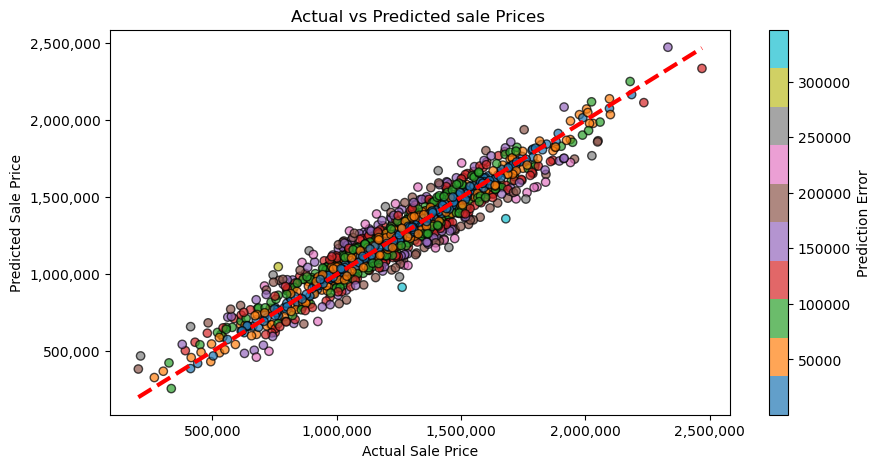

In [20]:
plt.figure(figsize=(10, 5))
colors=np.abs(y_pred - y_test)
plt.scatter(y_test,y_pred, c=colors, cmap='tab10', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()],'r--',lw=3)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted sale Prices ')
plt.colorbar(label="Prediction Error")
# Format the x and y axis to display numbers with commas and 2 decimal places
plt.tick_params(axis='x', labelrotation=0)
plt.tick_params(axis='y', labelrotation=0)

# Set the format of the tick labels to display commas and avoid scientific notation
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()